## Análise Equipe 11 | Strategy ID
------------------------------

![logo](/files/teste/logo.png)

### Objetivo 
------

* Nossa empresa é voltada para empresas que querem criar melhores estratégias de negócio, especializada em ajudar organizações a alcançarem seus objetivos financeiros e de crescimento por meio de soluções estratégicas de dados

### Insights 
------

* Identificar e maximizar a rentabilidade dos produtos ou serviços através da análise de produtos mais rentáveis. Sabemos que a maximização do lucro é um objetivo comum a todas as empresas e que a análise dos produtos é essencial

* Insights valiosos sobre as tendências de consumo e as demandas do mercado em cada região. Com base nesses insights, podemos recomendar ajustes na estratégia de marketing e vendas para maximizar o potencial de lucro em cada região

* Análise mensal dos itens vendidos: conseguimos entender as tendências de consumo dos clientes ao longo do tempo. Essa análise ajuda a identificar quais produtos estão vendendo mais e menos em diferentes períodos, permitindo que a empresa ajuste sua estratégia de oferta de produtos de acordo com a demanda do mercado

# Técnico

## Imports
------------------------------

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = spark.read.csv("/FileStore/tables/retail_1.csv", header=True, sep = ",")
df = df.toPandas()

## Análises e transformações iniciais
------------------------------

In [0]:
df.dtypes

Out[3]: invoice_no      object
stock_code      object
description     object
quantity        object
invoice_date    object
unit_price      object
customer_id     object
region          object
dtype: object

In [0]:
df["invoice_no"]   = df["invoice_no"].astype("string")
df["stock_code"]   = df["stock_code"].astype("string")
df["description"]  = df["description"].astype("string")
df["quantity"]     = df["quantity"].astype("int")
df["invoice_date"] = df["invoice_date"].astype("datetime64[ns]")
df["unit_price"] = df["unit_price"].str.replace(',','.').astype("float")
df["region"] = df["region"].astype("string")

In [0]:
df_1 = df[df['customer_id'].notnull()]

In [0]:
df_1.count()

Out[6]: invoice_no      406829
stock_code      406829
description     406829
quantity        406829
invoice_date    406829
unit_price      406829
customer_id     406829
region          406829
dtype: int64

In [0]:
df_1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [0]:
df_2 = df_1.query('quantity > 0')

In [0]:
df_qtde = df_2.groupby('stock_code').agg(quantidade=('stock_code', 'count')).reset_index()

In [0]:
df_2["stock_code"].unique()

Out[9]: <StringArray>
['85123A',  '71053', '84406B', '84029G', '84029E',  '22752',  '21730',
  '22633',  '22632',  '84879',
 ...
  '23562',  '23561', '90214F', '90214O', '90214T', '90214U', '90214W',
 '90214Z',  '90089',  '23843']
Length: 3665, dtype: string

In [0]:
df_2["receita"] = df_2["unit_price"] * df_2["quantity"]

<command-1335659207949910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["receita"] = df_2["unit_price"] * df_2["quantity"]


In [0]:
df_2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,receita
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [0]:
df_valor = df_2[["stock_code", "receita"]].groupby(["stock_code"]).sum().reset_index(level = ["stock_code"]).rename(columns={'receita': 'valor_total'})
df_valor.head()

,stock_code,valor_total
0,10002,699.55
1,10080,114.41
2,10120,40.53
3,10123C,3.25
4,10124A,6.72


In [0]:
df_valor.count()

Out[163]: stock_code     3665
valor_total    3665
dtype: int64

In [0]:
df_qtde = df_1[["stock_code", "quantity"]].groupby(["stock_code"]).count().reset_index(level = ["stock_code"]).rename(columns={'quantity': 'qtde_total'})
df_qtde.head()

,stock_code,qtde_total
0,10002,49
1,10080,21
2,10120,30
3,10123C,3
4,10124A,5


In [0]:
df_2 = df_qtde.join(df_valor.set_index(['stock_code']), on =['stock_code'], how = "left")
df_2.head()

,stock_code,qtde_total,valor_total
0,10002,49,699.55
1,10080,21,114.41
2,10120,30,40.53
3,10123C,3,3.25
4,10124A,5,6.72


In [0]:
## Maior quantidade de produtos

In [0]:
df_maior_qtde = df_2.nlargest(10, 'qtde_total')[['stock_code','qtde_total', "valor_total"]]

In [0]:
## Maior Receita de produtos

In [0]:
df_maior_valor = df_2.nlargest(10, 'valor_total')[['stock_code','qtde_total', "valor_total"]]

## Quantidade x Valor - Produto

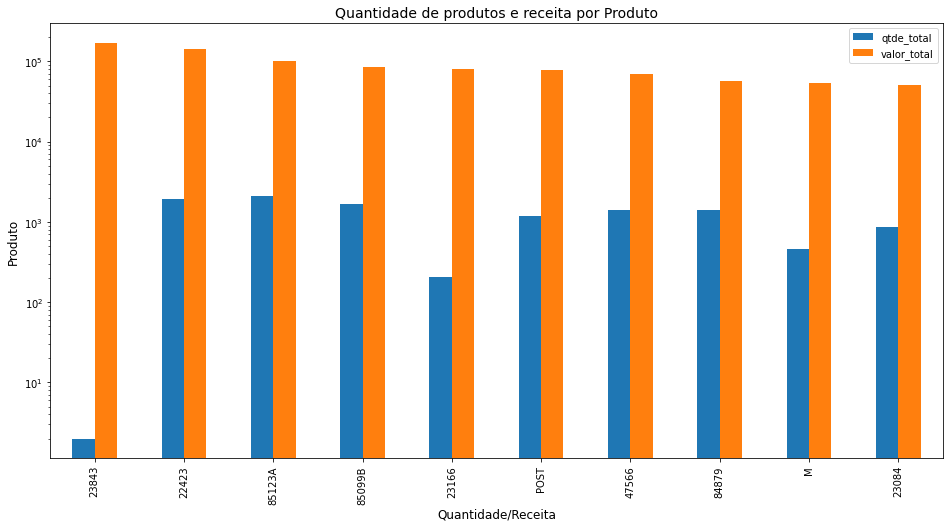

,stock_code,qtde_total,valor_total
2403,23843,2,168469.60
1292,22423,1905,142592.95
3249,85123A,2077,100603.50
3235,85099B,1662,85220.78
2001,23166,208,81416.73
3683,POST,1196,77803.96
2599,47566,1416,68844.33
3069,84879,1418,56580.34
3681,M,465,53779.93
1923,23084,857,51346.20


In [0]:
grafico = df_maior_valor.plot(kind='bar', x='stock_code', y=['qtde_total', 'valor_total'], figsize=(16, 8))
 
grafico.set_title('Quantidade de produtos e receita por Produto', fontsize=14)
grafico.set_xlabel('Quantidade/Receita', fontsize=12)
grafico.set_ylabel('Produto', fontsize=12)
 
grafico.set_yscale('log')
 
plt.show()

df_maior_valor.head(10)

In [0]:
df_maior_qtde = df_2.nlargest(10, 'qtde_total')[['stock_code','qtde_total', "valor_total"]]

## Top 10 Produtos mais Rentáveis - Produtos

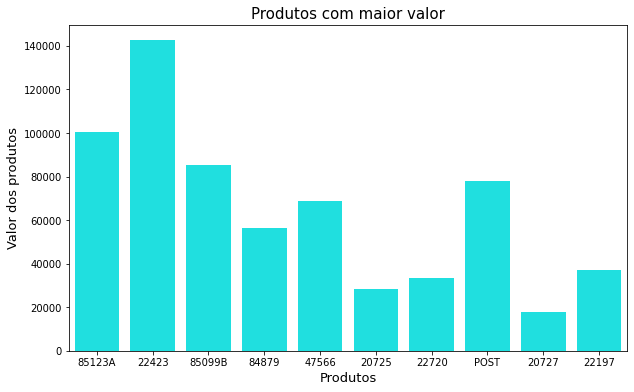

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_maior_qtde, x='stock_code', y='valor_total', ax=ax, color='cyan');
ax.set_ylabel('Valor dos produtos', fontsize=13);
ax.set_xlabel('Produtos', fontsize=13);
ax.set_title('Produtos com maior valor', fontsize=15);

## Top 10 Produtos com maior Quantidade - Produtos

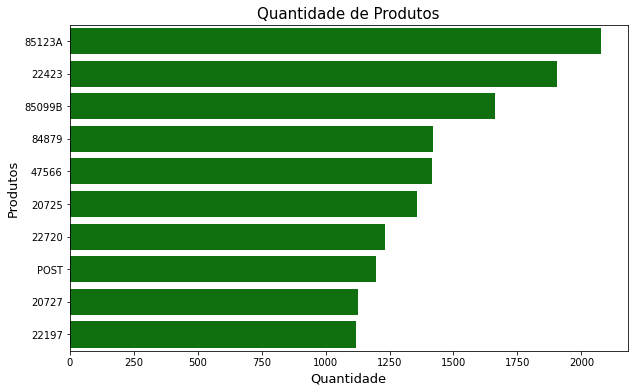

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_maior_qtde, y='stock_code', x='qtde_total', ax=ax, color='green');
ax.set_ylabel('Produtos', fontsize=13);
ax.set_xlabel('Quantidade', fontsize=13);
ax.set_title('Quantidade de Produtos', fontsize=15);

<br>

##Analise por região

In [0]:
df['revenue'] = df['quantity'] * df['unit_price']
df_receita_regiao = df.groupby(['region'])['revenue'].sum().reset_index()

df_receita_regiao['posicao'] = df_receita_regiao['revenue'].rank(ascending=False)
 
df_receita_regiao.sort_values('revenue', ascending=False, inplace = True)

display(df_receita_regiao)

region,revenue,posicao
United Kingdom,8187806.364,1.0
Netherlands,284661.54,2.0
EIRE,263276.82,3.0
Germany,221698.21,4.0
France,197403.9,5.0
Australia,137077.27,6.0
Switzerland,56385.35,7.0
Spain,54774.58,8.0
Belgium,40910.96,9.0
Sweden,36595.91,10.0


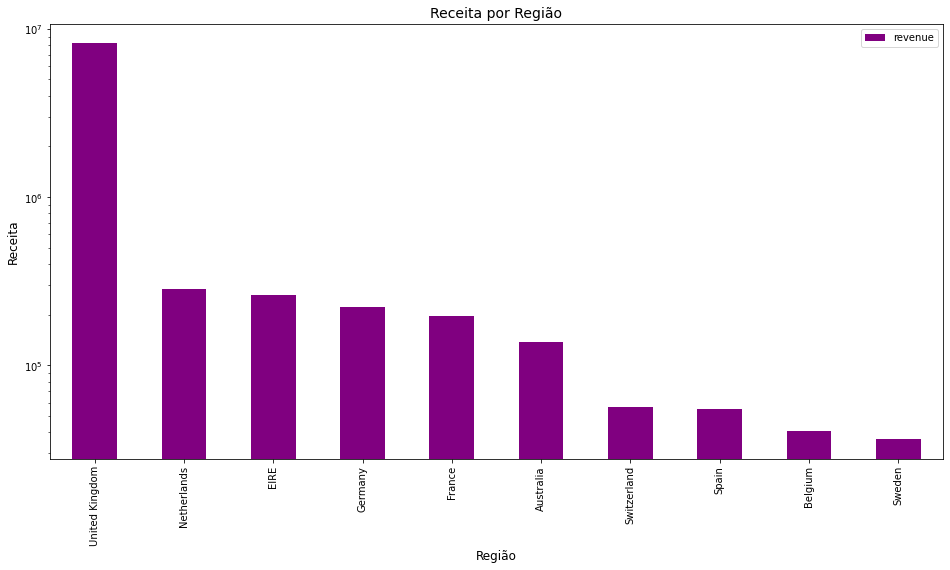

In [0]:
df_receita_regiao_top10 = df_receita_regiao.query("posicao <= 10")

grafico = df_receita_regiao_top10.plot(kind='bar', x='region', y='revenue', figsize=(16,8), color='purple')

grafico.set_xlabel('Região', fontsize=12)
grafico.set_ylabel('Receita', fontsize=12)
grafico.set_title('Receita por Região', fontsize=14)
grafico.set_yscale('log')


plt.show()

In [0]:
df_qtd_regiao = df.groupby(['region'])['quantity'].sum().reset_index()

df_qtd_regiao['posicao'] = df_qtd_regiao['quantity'].rank(ascending=False)
 
df_qtd_regiao.sort_values('quantity', ascending=False, inplace = True)

display(df_qtd_regiao)

region,quantity,posicao
United Kingdom,4263829,1.0
Netherlands,200128,2.0
EIRE,142637,3.0
Germany,117448,4.0
France,110480,5.0
Australia,83653,6.0
Sweden,35637,7.0
Switzerland,30325,8.0
Spain,26824,9.0
Japan,25218,10.0


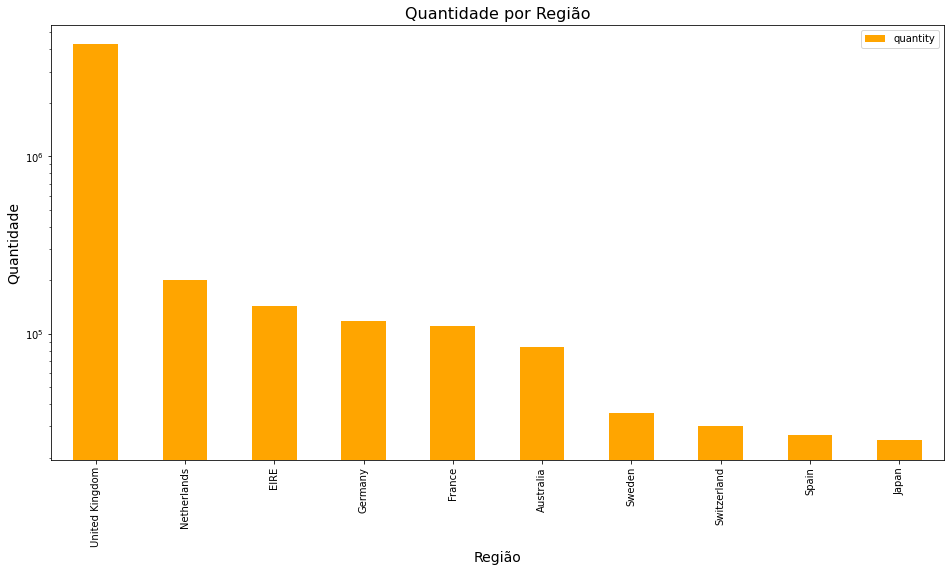

In [0]:
df_qtd_regiao_top10 = df_qtd_regiao.query("posicao <= 10")

grafico = df_qtd_regiao_top10.plot(kind='bar', x='region', y='quantity', figsize=(16, 8), color='orange')

grafico.set_xlabel('Região', fontsize=14)
grafico.set_ylabel('Quantidade', fontsize=14)
grafico.set_title('Quantidade por Região', fontsize=16)
grafico.set_yscale('log')

plt.show()

In [0]:
df_regiao = pd.merge(df_qtd_regiao, df_receita_regiao, on='region')
df_regiao['revenue_por_qtd'] = df_regiao['revenue'] / df_regiao['quantity']

df_regiao_top10 = df_regiao.query("posicao_x <= 12")

display(df_regiao_top10)

region,quantity,posicao_x,revenue,posicao_y,revenue_por_qtd
United Kingdom,4263829,1.0,8187806.364,1.0,1.9202942622698986
Netherlands,200128,2.0,284661.54,2.0,1.422397365685961
EIRE,142637,3.0,263276.82,3.0,1.8457820902009998
Germany,117448,4.0,221698.21,4.0,1.887628652680335
France,110480,5.0,197403.9,5.0,1.7867840333091962
Australia,83653,6.0,137077.27,6.0,1.638641411545312
Sweden,35637,7.0,36595.91,10.0,1.0269077082807196
Switzerland,30325,8.0,56385.35,7.0,1.8593685078318218
Spain,26824,9.0,54774.58,8.0,2.041998956158664
Japan,25218,10.0,35340.62,11.0,1.40140455230391


In [0]:
df_regiao_top10_por_qtd = df_regiao_top10.sort_values('revenue_por_qtd', ascending=False)

display(df_regiao_top10_por_qtd)

region,quantity,posicao_x,revenue,posicao_y,revenue_por_qtd
Spain,26824,9.0,54774.58,8.0,2.041998956158664
United Kingdom,4263829,1.0,8187806.364,1.0,1.9202942622698986
Germany,117448,4.0,221698.21,4.0,1.887628652680335
Switzerland,30325,8.0,56385.35,7.0,1.8593685078318218
EIRE,142637,3.0,263276.82,3.0,1.8457820902009998
Norway,19247,12.0,35163.46,12.0,1.8269579674754506
France,110480,5.0,197403.9,5.0,1.7867840333091962
Belgium,23152,11.0,40910.96,9.0,1.7670594333102971
Australia,83653,6.0,137077.27,6.0,1.638641411545312
Netherlands,200128,2.0,284661.54,2.0,1.422397365685961


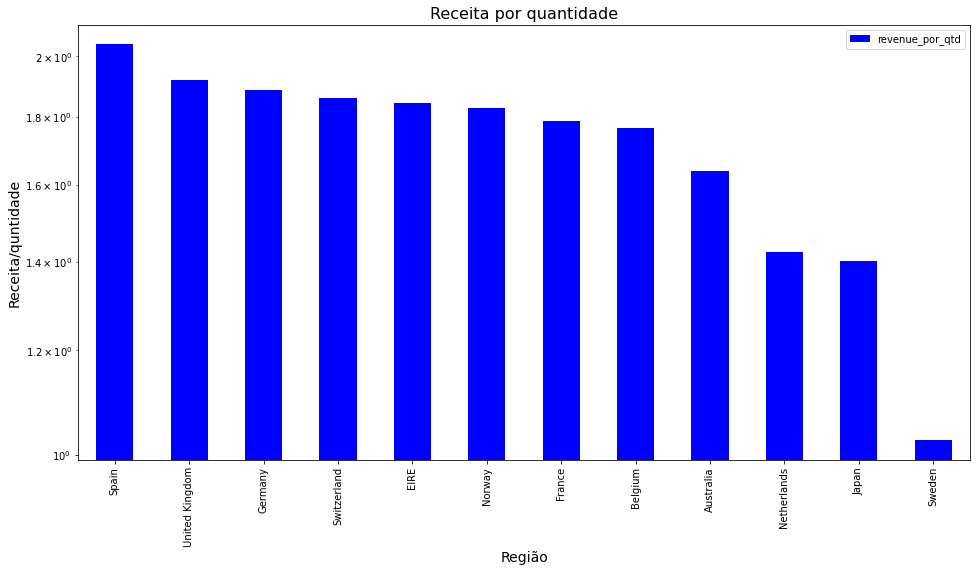

In [0]:
grafico = df_regiao_top10_por_qtd.plot(kind='bar', x='region', y='revenue_por_qtd', figsize=(16, 8), color= 'blue')

grafico.set_xlabel('Região', fontsize=14)
grafico.set_ylabel('Receita/quntidade', fontsize=14)
grafico.set_title('Receita por quantidade', fontsize=16)

grafico.set_yscale('log')

plt.show()

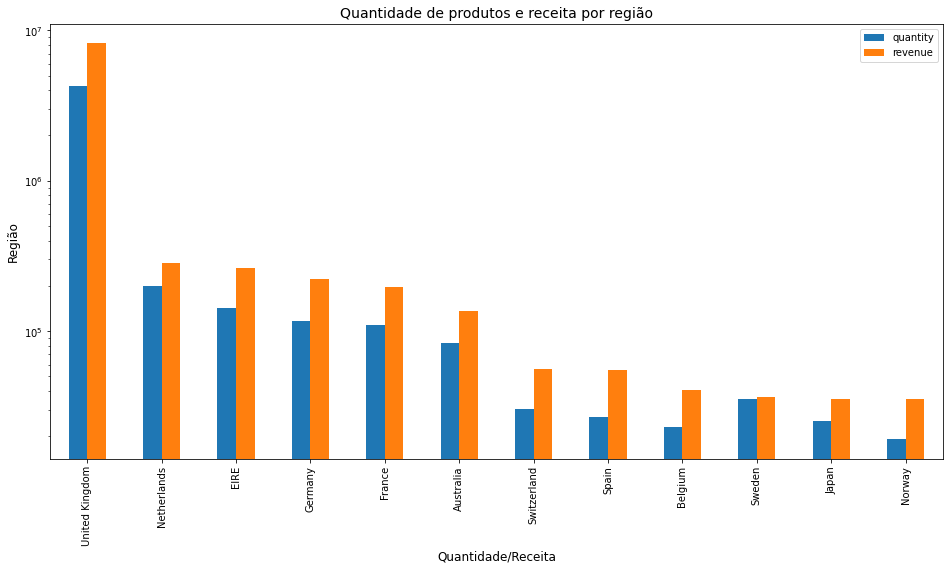

In [0]:
df_regiao_top10 = df_regiao_top10.sort_values('revenue', ascending=False)

grafico = df_regiao_top10.plot(kind='bar', x='region', y=['quantity', 'revenue'], figsize=(16, 8))

grafico.set_title('Quantidade de produtos e receita por região', fontsize=14)
grafico.set_xlabel('Quantidade/Receita', fontsize=12)
grafico.set_ylabel('Região', fontsize=12)

grafico.set_yscale('log')

plt.show()

##Analise mensal dos itens vendidos

In [0]:
df_1 = df_1[df_1['quantity'] > 0]

In [0]:
#df_1["region"] = df_1["region"].astype("string")
def region_bar(region: str, title: str, xlabel: str, ylabel: str):
    df_renda =  df_1[['invoice_no', 'stock_code', 'quantity', 'unit_price', 'invoice_date', 'region']]
    df_renda = df_renda.assign(valor_total = df_renda['quantity']*df_renda['unit_price'])
   
    df_region = df_renda[df_renda['region'] == region]
   
    df_mes_up = df_region[['valor_total']].groupby([df_region['invoice_date'].dt.strftime("%Y/%m")]).sum()
    df_mes_up = df_mes_up.sort_values(by='invoice_date')
   
    df_mes_qtt = df_region[['quantity']].groupby([df_region['invoice_date'].dt.strftime("%Y/%m")]).sum()
    df_mes_qtt = df_mes_qtt.sort_values(by='invoice_date')
   
    df_mix = df_mes_up.merge(df_mes_qtt, on='invoice_date', how='left').rename(columns={"quantity": "quantidade_produtos"})
   
    df_mix.plot.bar(y=['valor_total','quantidade_produtos'], figsize = (16, 8))
   
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
   
    return()

In [0]:
df_renda =  df[['invoice_no', 'stock_code', 'quantity', 'unit_price', 'invoice_date', 'region']]
df_renda = df_renda.assign(valor_total = df_renda['quantity']*df_renda['unit_price'])

Out[95]: Text(0, 0.5, 'Valor total')

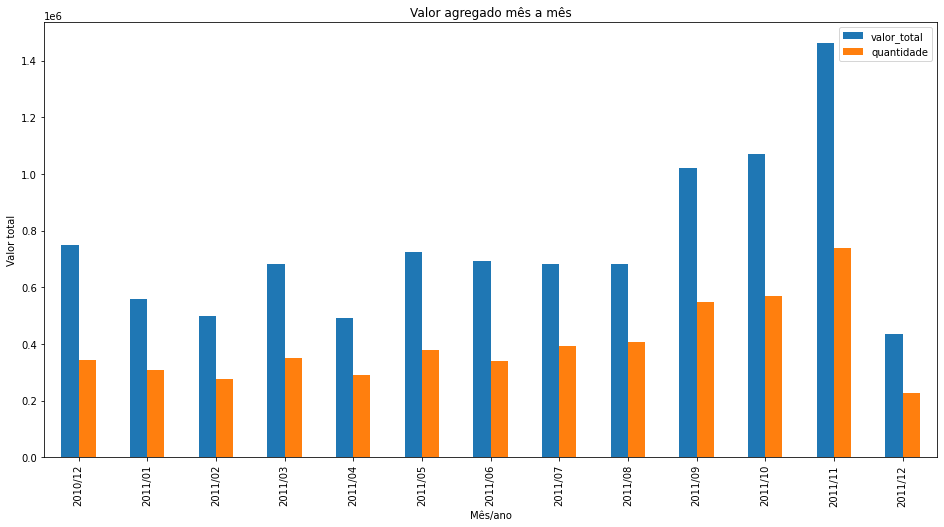

In [0]:
#Preço total por mês
df_mes_up = df_renda[['valor_total']].groupby([df_renda['invoice_date'].dt.strftime("%Y/%m")]).sum()
#df_mes_up['valor_total%'] = (df_mes_up['valor_total'] / 
#                            df_mes_up['valor_total'].sum()) * 100
df_mes_up =df_mes_up.sort_values(by='invoice_date')

#Quantidade vendida por mês
df_mes_qtt = df_renda[['quantity']].groupby([df_renda['invoice_date'].dt.strftime("%Y/%m")]).sum()
#df_mes_qtt['qtt_total%'] = (df_mes_qtt['quantity'] / 
#                            df_mes_qtt['quantity'].sum()) * 100
df_mes_qtt =df_mes_qtt.sort_values(by='invoice_date')

#Merge dos dataframes
df_mix = df_mes_up.merge(df_mes_qtt, on='invoice_date', how='left').rename(columns={"quantity": "quantidade"})

bar_final = df_mix.plot.bar(y=['valor_total','quantidade'], figsize = (16, 8))

plt.title("Valor agregado mês a mês")
plt.xlabel("Mês/ano")
plt.ylabel("Valor total")

## Histórico das compras na espanha para entendimento de quantidade e valor agregado

Out[107]: ()

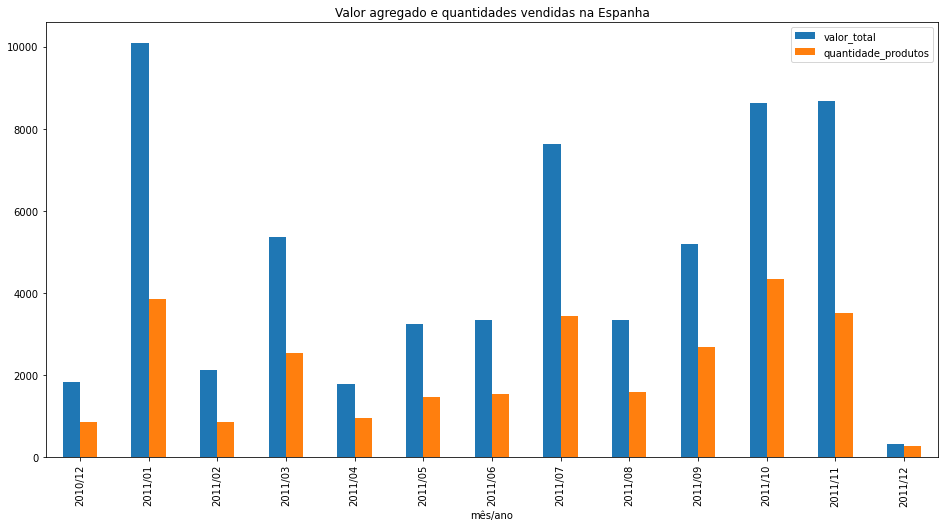

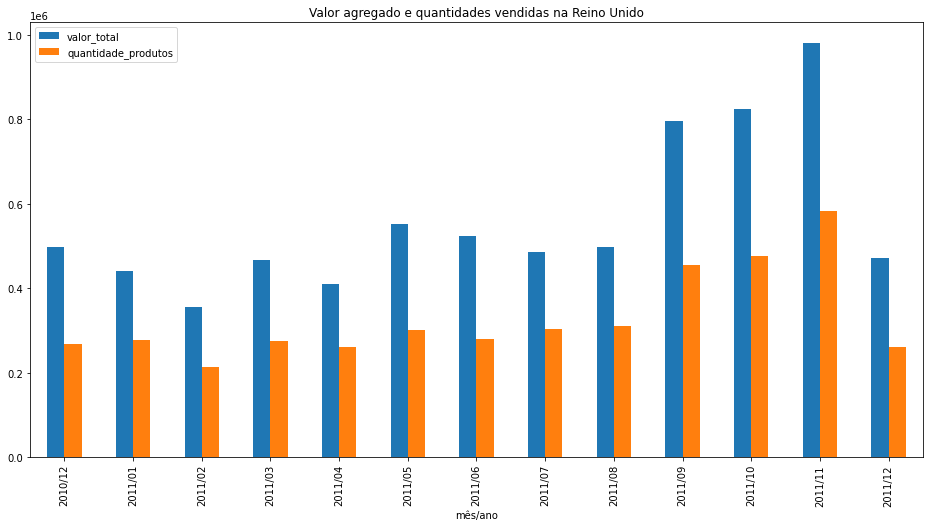

In [0]:
region_bar("Spain", "Valor agregado e quantidades vendidas na Espanha", "mês/ano", "")

region_bar("United Kingdom", "Valor agregado e quantidades vendidas na Reino Unido", "mês/ano", "")

In [0]:
#region_bar("United Kingdom", "Valor agregado e quantidades vendidas na Reino Unido", "mês/ano", "")